In [1]:
%matplotlib notebook
from ipynb.fs.defs.utilities import *

In [2]:
#Create customized color bar

N = 256
vals = np.ones((N, 4))
vals_seg1 = np.ones((N, 4))
vals_seg2 = np.ones((N, 4))

col1 = [70, 130, 180]
col2 = [214, 244, 255]
col3 = [227, 158, 33]

vals_seg1[:, 0] = np.linspace(col1[0]/256, col2[0]/256, N)
vals_seg1[:, 1] = np.linspace(col1[1]/256, col2[1]/256, N)
vals_seg1[:, 2] = np.linspace(col1[2]/256, col2[2]/256, N)

vals_seg2[:, 0] = np.linspace(col2[0]/256, col3[0]/256, N)
vals_seg2[:, 1] = np.linspace(col2[1]/256, col3[1]/256, N)
vals_seg2[:, 2] = np.linspace(col2[2]/256, col3[2]/256, N)

vals = np.concatenate((vals_seg1,vals_seg2))

cmp_blue_3col = ListedColormap(vals)
cmp_blue_3col_inv = ListedColormap(cmp_blue_3col.colors[::-1])

# Workspace and analysis of 2d electromagnetic navigation systems

## Two-coil systems

### Influence of the coils' relative orientation

In [3]:
# Load systems calibration
cal_path_mns1 = 'models/mns_2coils_90deg.yaml'
model_90 = ForwardModelMPEM()
model_90.setCalibrationFile(cal_path_mns1)

cal_path_mns2 = 'models/mns_2coils_45deg.yaml'
model_45 = ForwardModelMPEM()
model_45.setCalibrationFile(cal_path_mns2)

cal_path_mns3 = 'models/mns_2coils_135deg.yaml'
model_135 = ForwardModelMPEM()
model_135.setCalibrationFile(cal_path_mns3)

cal_path_mns4 = 'models/mns_2coils_180deg.yaml'
model_180 = ForwardModelMPEM()
model_180.setCalibrationFile(cal_path_mns4)

In [4]:
Nx = 100
Ny = 100

#Build initial box
pmin = -0.1
pmax = 0.1

#Define inputs interval and task set
Imin = -1
Imax = 1
bmin = -0.02
bmax = 0.02

p_all_45, p_ws_45_in, p_ws_45_out, p_ws_45_side, kappa_45, mu_45, gci_45, minDist_45 = Ws2DDeterminationDiscr(Nx,Ny,pmin,pmax,bmin,bmax,Imin,Imax,model_45)
p_all_90, p_ws_90_in, p_ws_90_out, p_ws_90_side, kappa_90, mu_90, gci_90, minDist_90 = Ws2DDeterminationDiscr(Nx,Ny,pmin,pmax,bmin,bmax,Imin,Imax,model_90)
p_all_135, p_ws_135_in, p_ws_135_out, p_ws_135_side, kappa_135, mu_135, gci_135, minDist_135 = Ws2DDeterminationDiscr(Nx,Ny,pmin,pmax,bmin,bmax,Imin,Imax,model_135)
p_all_180, p_ws_180_in, p_ws_180_out, p_ws_180_side, kappa_180, mu_180, gci_180, minDist_180 = Ws2DDeterminationDiscr(Nx,Ny,pmin,pmax,bmin,bmax,Imin,Imax,model_180)


# Global conditionning index
print(gci_45)
print(gci_90)
print(gci_135)
print(gci_180)

0.3059424879581696
0.35136570295940467
0.4488619898935555
0.5032947465698636


<IPython.core.display.Javascript object>


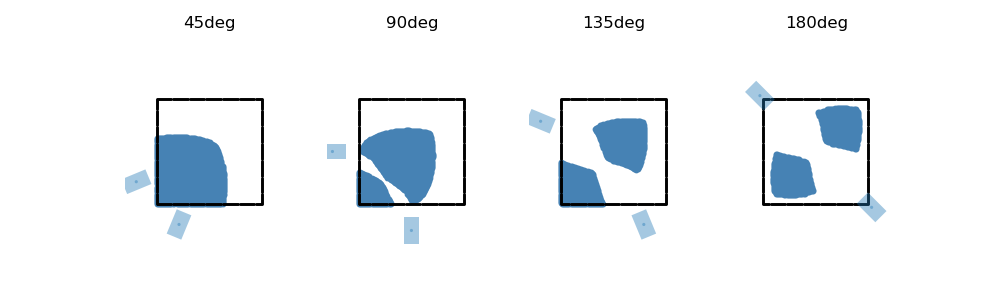

In [5]:
coil_length = 0.05
coil_width = 0.03


fig = plt.figure(figsize=(10, 3))

lim = 0.16

ax = fig.add_subplot(141)
ax.scatter(p_ws_45_in[:,0],p_ws_45_in[:,1], color='steelblue',alpha=1., s = 10, rasterized=True)
ax.scatter(p_ws_45_side[:,0],p_ws_45_side[:,1], color='black',alpha=1., s = 1, rasterized=True)
coll = Coils2DPatch(coil_length,coil_width,cal_path_mns2)
ax.add_collection(coll)
ax.axis('equal')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_title('45deg')
ax.axis('off')

ax = fig.add_subplot(142)
ax.scatter(p_ws_90_in[:,0],p_ws_90_in[:,1], color='steelblue',alpha=1., s = 10, rasterized=True)
ax.scatter(p_ws_90_side[:,0],p_ws_90_side[:,1], color='black',alpha=1., s = 1., rasterized=True)
coll = Coils2DPatch(coil_length,coil_width,cal_path_mns1)
ax.add_collection(coll)
ax.axis('equal')
ax.set_title('90deg')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.axis('off')

ax = fig.add_subplot(143)
ax.scatter(p_ws_135_in[:,0],p_ws_135_in[:,1], color='steelblue',alpha=1., s = 10, rasterized=True)
ax.scatter(p_ws_135_side[:,0],p_ws_135_side[:,1], color='black',alpha=1., s = 1., rasterized=True)
coll = Coils2DPatch(coil_length,coil_width,cal_path_mns3)
ax.add_collection(coll)
ax.axis('equal')
ax.set_title('135deg')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.axis('off')

ax = fig.add_subplot(144)
ax.scatter(p_ws_180_in[:,0],p_ws_180_in[:,1], color='steelblue',alpha=1, s = 10, rasterized=True)
ax.scatter(p_ws_180_side[:,0],p_ws_180_side[:,1], color='black',alpha=1., s = 1., rasterized=True)
coll = Coils2DPatch(coil_length,coil_width,cal_path_mns4)
ax.add_collection(coll)
ax.axis('equal')
ax.set_title('180deg')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.axis('off')

plt.show()

<IPython.core.display.Javascript object>


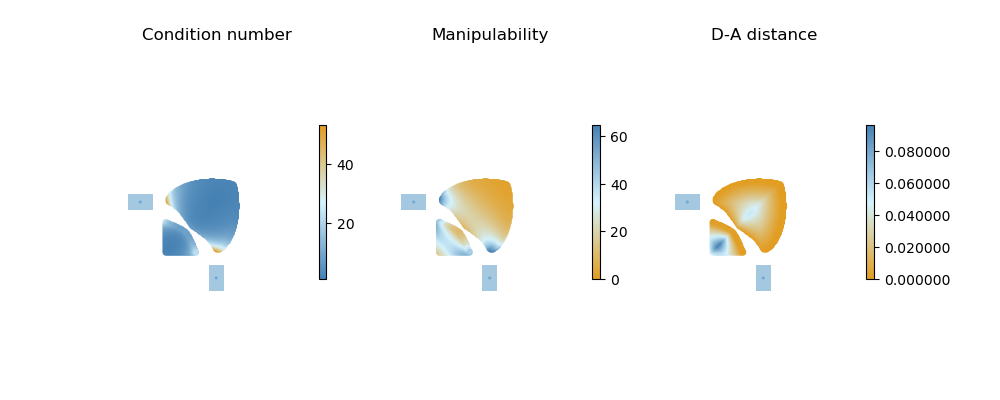

In [6]:
fig = plt.figure(figsize=(10,4))

lim = 0.18

ax = fig.add_subplot(131)
s1 = ax.scatter(p_ws_90_in[:,0],p_ws_90_in[:,1], c=kappa_90,alpha=1., s = 10, cmap = cmp_blue_3col, rasterized=True, vmin=1, vmax=kappa_90.max())
coll = Coils2DPatch(coil_length,coil_width,cal_path_mns1)
ax.add_collection(coll)
ax.axis('equal')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_title('Condition number')
ax.axis('off')
fig.colorbar(s1, ax=ax,shrink=0.5)

ax = fig.add_subplot(132)
s2 = ax.scatter(p_ws_90_in[:,0],p_ws_90_in[:,1], c=mu_90,alpha=1., s = 10,cmap = cmp_blue_3col_inv, rasterized=True, vmin=0, vmax=mu_90.max())
coll = Coils2DPatch(coil_length,coil_width,cal_path_mns1)
ax.add_collection(coll)
ax.axis('equal')
ax.set_title('Manipulability')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.axis('off')
fig.colorbar(s2, ax=ax,shrink=0.5)

ax = fig.add_subplot(133)
s2 = ax.scatter(p_ws_90_in[:,0],p_ws_90_in[:,1], c=minDist_90,alpha=1., s = 10,cmap = cmp_blue_3col_inv, rasterized=True, vmin=0, vmax=minDist_90.max())
coll = Coils2DPatch(coil_length,coil_width,cal_path_mns1)
ax.add_collection(coll)
ax.axis('equal')
ax.set_title('D-A distance')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.axis('off')
fig.colorbar(s2, ax=ax,shrink=0.5)

### Inflence of the coils' distance

In [7]:
# Load systems calibration
cal_path_mns21 = 'models/mns_2coils_parallel_50.yaml'
model_para_50 = ForwardModelMPEM()
model_para_50.setCalibrationFile(cal_path_mns21)

cal_path_mns22 = 'models/mns_2coils_parallel_100.yaml'
model_para_100 = ForwardModelMPEM()
model_para_100.setCalibrationFile(cal_path_mns22)

cal_path_mns23 = 'models/mns_2coils_parallel_150.yaml'
model_para_150 = ForwardModelMPEM()
model_para_150.setCalibrationFile(cal_path_mns23)

cal_path_mns24 = 'models/mns_2coils_parallel_200.yaml'
model_para_200 = ForwardModelMPEM()
model_para_200.setCalibrationFile(cal_path_mns24)

In [8]:
Nx = 100
Ny = 100

p_all_50, p_ws_50_in, p_ws_50_out, p_ws_50_side, kappa_50, mu_50, gci, minDist_50 = Ws2DDeterminationDiscr(Nx,Ny,pmin,pmax,bmin,bmax,Imin,Imax,model_para_50)
print(gci)
p_all_100, p_ws_100_in, p_ws_100_out, p_ws_100_side, kappa_100, mu_100, gci, minDist_100 = Ws2DDeterminationDiscr(Nx,Ny,pmin,pmax,bmin,bmax,Imin,Imax,model_para_100)
print(gci)
p_all_150, p_ws_150_in, p_ws_150_out, p_ws_150_side, kappa_150, mu_150, gci, minDist_150 = Ws2DDeterminationDiscr(Nx,Ny,pmin,pmax,bmin,bmax,Imin,Imax,model_para_150)
print(gci)
p_all_200, p_ws_200_in, p_ws_200_out, p_ws_200_side, kappa_200, mu_20, gci, minDist_200 = Ws2DDeterminationDiscr(Nx,Ny,pmin,pmax,bmin,bmax,Imin,Imax,model_para_200)
print(gci)

0.2740187086424924
0.3405119232517469
0.33203455790615904
0.4089052133135094


<IPython.core.display.Javascript object>


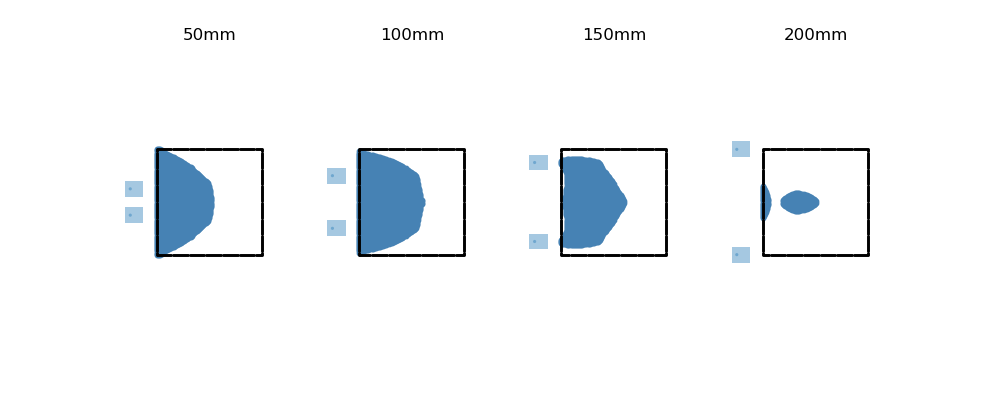

In [9]:
fig = plt.figure(figsize=(10, 4))

lim = 0.16

ax = fig.add_subplot(141)
ax.scatter(p_ws_50_in[:,0],p_ws_50_in[:,1], color='steelblue',alpha=1., s = 10, rasterized=True)
ax.scatter(p_ws_50_side[:,0],p_ws_50_side[:,1], color='black',alpha=1., s = 1, rasterized=True)
coll = Coils2DPatch(coil_length,coil_width,cal_path_mns21)
ax.add_collection(coll)
ax.axis('equal')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_title('50mm')
ax.axis('off')

ax = fig.add_subplot(142)
ax.scatter(p_ws_100_in[:,0],p_ws_100_in[:,1], color='steelblue',alpha=1., s = 10, rasterized=True)
ax.scatter(p_ws_100_side[:,0],p_ws_100_side[:,1], color='black',alpha=1., s = 1., rasterized=True)
coll = Coils2DPatch(coil_length,coil_width,cal_path_mns22)
ax.add_collection(coll)
ax.axis('equal')
ax.set_title('100mm')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.axis('off')

ax = fig.add_subplot(143)
ax.scatter(p_ws_150_in[:,0],p_ws_150_in[:,1], color='steelblue',alpha=1., s = 10, rasterized=True)
ax.scatter(p_ws_150_side[:,0],p_ws_150_side[:,1], color='black',alpha=1., s = 1., rasterized=True)
coll = Coils2DPatch(coil_length,coil_width,cal_path_mns23)
ax.add_collection(coll)
ax.axis('equal')
ax.set_title('150mm')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.axis('off')

ax = fig.add_subplot(144)
ax.scatter(p_ws_200_in[:,0],p_ws_200_in[:,1], color='steelblue',alpha=1, s = 10, rasterized=True)
ax.scatter(p_ws_200_side[:,0],p_ws_200_side[:,1], color='black',alpha=1., s = 1., rasterized=True)
coll = Coils2DPatch(coil_length,coil_width,cal_path_mns24)
ax.add_collection(coll)
ax.axis('equal')
ax.set_title('200mm')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.axis('off')

plt.show()

## Four-coil systems

In [10]:
# Load systems calibration
cal_path_mns41 = 'models/mns_4coils_1.yaml'
model_4coil1 = ForwardModelMPEM()
model_4coil1.setCalibrationFile(cal_path_mns41)

cal_path_mns42 = 'models/mns_4coils_2.yaml'
model_4coil2 = ForwardModelMPEM()
model_4coil2.setCalibrationFile(cal_path_mns42)

In [11]:
Nx = 100
Ny = 100

p_all_41, p_ws_41_in, p_ws_41_out, p_ws_41_side, kappa_41, mu_41, gci, minDist_41 = Ws2DDeterminationDiscr(Nx,Ny,pmin,pmax,bmin,bmax,Imin/2,Imax/2,model_4coil1)
p_all_42, p_ws_42_in, p_ws_42_out, p_ws_42_side, kappa_42, mu_42, gci, minDist_42 = Ws2DDeterminationDiscr(Nx,Ny,pmin,pmax,bmin,bmax,Imin/2,Imax/2,model_4coil2)

<IPython.core.display.Javascript object>


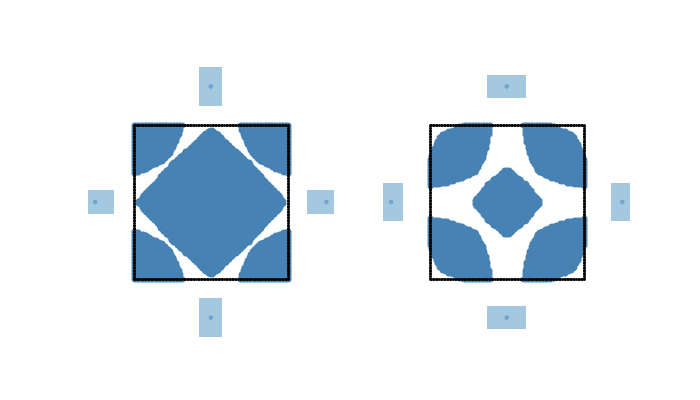

(-0.16, 0.16, -0.16, 0.16)

In [12]:
fig = plt.figure(figsize=(7, 4))

ax = fig.add_subplot(121)
ax.scatter(p_ws_41_in[:,0],p_ws_41_in[:,1], color='steelblue',alpha=1., s = 10, rasterized=True)
ax.scatter(p_ws_41_side[:,0],p_ws_41_side[:,1], color='black',alpha=1., s = 1., rasterized=True)
coll = Coils2DPatch(coil_length,coil_width,cal_path_mns41)
ax.add_collection(coll)
ax.axis('equal')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.axis('off')

ax = fig.add_subplot(122)
ax.scatter(p_ws_42_in[:,0],p_ws_42_in[:,1], color='steelblue',alpha=1, s = 10, rasterized=True)
ax.scatter(p_ws_42_side[:,0],p_ws_42_side[:,1], color='black',alpha=1., s = 1., rasterized=True)
coll = Coils2DPatch(coil_length,coil_width,cal_path_mns42)
ax.add_collection(coll)
ax.axis('equal')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.axis('off')

<IPython.core.display.Javascript object>


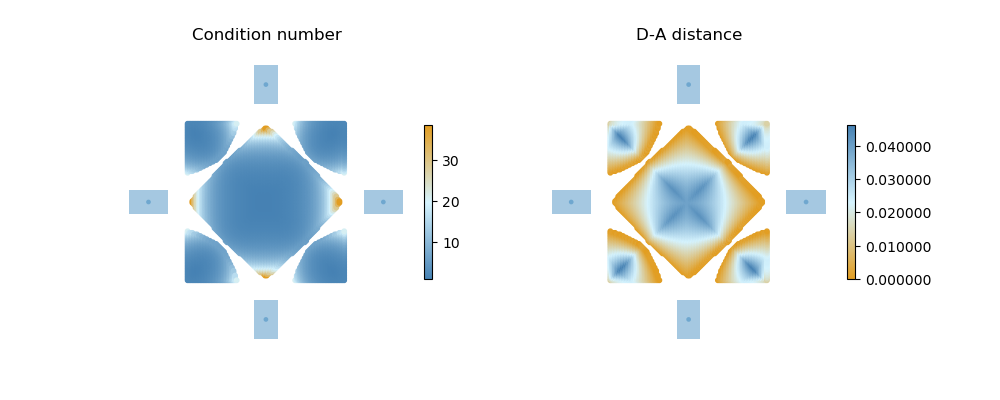

In [13]:
fig = plt.figure(figsize=(10,4))


lim = 0.18

ax = fig.add_subplot(121)
s1 = ax.scatter(p_ws_41_in[:,0],p_ws_41_in[:,1], c=kappa_41,alpha=1.,cmap = cmp_blue_3col ,s = 10, rasterized=True, vmin = 1, vmax = kappa_41.max())
coll = Coils2DPatch(coil_length,coil_width,cal_path_mns41)
ax.add_collection(coll)
ax.axis('equal')
ax.set_title('Condition number')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.axis('off')
fig.colorbar(s1, ax=ax,shrink=0.5)


ax = fig.add_subplot(122)
s2 = ax.scatter(p_ws_41_in[:,0],p_ws_41_in[:,1], c=minDist_41,alpha=1,cmap =cmp_blue_3col_inv, s = 10, rasterized=True, vmin = 0, vmax = minDist_41.max())
coll = Coils2DPatch(coil_length,coil_width,cal_path_mns41)
ax.add_collection(coll)
ax.axis('equal')
ax.set_title('D-A distance')
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.axis('off')
fig.colorbar(s2, ax=ax,shrink=0.5)